# Hypothesis Statement
## 1.) Oil spills will increase both in volume and number in the next 5 years.
## 2.) Small spills less than 1 barrel will be more common than giant spills of more than 1000 barrels.
## 3.) Most of the spills will be from sabotage/theft and will be happen on land  and swamps habitat.
## 4.) Spills of composition type crude oil will be the most dominant in the next 5 years .
## 5.) There are usually more spills towards the end of the year.

In [2]:
#imports library
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

# Data collection and wrangling
## 1.) Scrap raw data from the NOSDRA Website, load and organize into Python dataframe.

In [4]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

## 2.) Preliminary data reconnaissance

In [5]:
df0.shape

(14902, 41)

### The data contains 14,892 rows of oil spill data organized into 41 columns

In [6]:
df0.head()

id     status company    incidentnumber incidentdate contaminant estimatedquantity                           sitelocationname spillareahabitat lastupdatedby cause  updatefor latitude longitude statesaffected attachments jivdate  lga zonaloffice certificatedate certificatenumber formadate reportdate spillstopdate initialcontainmentmeasures descriptionofimpact formbdate formcdate jivpresent typeoffacility cleanupcompleteddate cleanupmethods cleanupdate quantityrecovered postcleanupinspectiondate finalsamplingdate estimatedspillarea remediationstart remediationtype remediationend postimpactassessmentdate
0   2  confirmed   ADDAX  HSE/OBO/0611/101   2006-11-23          cr               225  Subsea Pipeline @ Mimbo Platform (OML123)               of        NOSDRA   NaN        NaN      NaN       NaN            NaN         NaN     NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
1   3  confirmed   ADDAX  HSE/OBO/0612/108   2006-12-18          cr               0.5       EBNE04HT @ Ebughu Platform (OML 123)               of        NOSDRA   eqf        NaN      NaN       NaN            NaN         NaN     NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
2   4  confirmed   ADDAX  HSE/OBO/0612/110   2006-12-27          cr                25                South East of BOGI Platform               of        NOSDRA   NaN        NaN      NaN       NaN            NaN         NaN     NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
3   5  confirmed   ADDAX  HSE/OBO/0706/166   2007-05-14          cr                 2                         Adanga Platform                  of        NOSDRA   NaN        NaN      NaN       NaN            NaN         NaN     NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN
4   6  confirmed   ADDAX  HSE/OBO/0708/201   2007-08-16          gs               NaN              Izombe Well #10LS 4" Flowline               la        NOSDRA   NaN        NaN      NaN       NaN            NaN         NaN     NaN  NaN         NaN             NaN               NaN       NaN        NaN           NaN                        NaN                 NaN       NaN       NaN        NaN            NaN                  NaN            NaN         NaN               NaN                       NaN               NaN                NaN              NaN             NaN            NaN                      NaN

## This shows the first 10 rows of the data

In [7]:
print ("The columns in the dataframe are:", df0.columns.values)

The columns in the dataframe are: ['id' 'status' 'company' 'incidentnumber' 'incidentdate' 'contaminant'
 'estimatedquantity' 'sitelocationname' 'spillareahabitat' 'lastupdatedby'
 'cause' 'updatefor' 'latitude' 'longitude' 'statesaffected' 'attachments'
 'jivdate' 'lga' 'zonaloffice' 'certificatedate' 'certificatenumber'
 'formadate' 'reportdate' 'spillstopdate' 'initialcontainmentmeasures'
 'descriptionofimpact' 'formbdate' 'formcdate' 'jivpresent'
 'typeoffacility' 'cleanupcompleteddate' 'cleanupmethods' 'cleanupdate'
 'quantityrecovered' 'postcleanupinspectiondate' 'finalsamplingdate'
 'estimatedspillarea' 'remediationstart' 'remediationtype'
 'remediationend' 'postimpactassessmentdate']


In [8]:
print ('The data types in each column in the dataframe are:', df0.dtypes)

The data types in each column in the dataframe are: id                              int64
status                         object
company                        object
incidentnumber                 object
incidentdate                   object
contaminant                    object
estimatedquantity              object
sitelocationname               object
spillareahabitat               object
lastupdatedby                  object
cause                          object
updatefor                     float64
latitude                       object
longitude                      object
statesaffected                 object
attachments                    object
jivdate                        object
lga                            object
zonaloffice                    object
certificatedate                object
certificatenumber              object
formadate                      object
reportdate                     object
spillstopdate                  object
initialcontainmentmeasures     objec

### Consistent with the usual data types taken on by data when a json file is imported into python

##  3.) Data cleanup procedures 

### a.) Data relocation, fix some typographical errors
### b.) Removing irrelevant columns, rows
### c.) Changing of data types: Incidentdate   to datetime, estimatedquantity to numeric, category to dummy variables.
### d.) Missing data
### e.) Grouping of data according to variable types
### f.) Upsampling of data from days - weeks, months, quarters, years
### g.) Preparation of data  for Machine learning

In [9]:
print ('The status of the oil spills can fall into any one of this category:', df0['status'].unique())

The status of the oil spills can fall into any one of this category: ['confirmed' 'invalid' 'inconclusive' 'reviewed']


We are only interested in oil spills that were 'confirmed' or 'reviewed', so we will delete spills that are 'invalid' or'inconclusive'

In [10]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [11]:
df1.shape

(14395, 41)

This reduces the number of spills from 14,892 to 14,385. So about 500no. spill falls into the invalid and inconclusive categories.

In [12]:
df1.replace(to_replace = '20014-07-08', value = '2014-07-08', inplace = True) #Replaces a typograpical error

C:\Users\OMEDE\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
df1.incidentdate.isna().sum()

577

The oil spill incidentdates which will be very vital to our analysis contains 577 empty/missing dates. Some of these missing dates were from errors made while inputing data on the database. From the columns on the dataframe 2 other dates are closely related to the incidentdate which are reportdate and formadate as oil spill are expected to reported within 24hrs of the spill and the report goes into the 'forma'.

In [14]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate

C:\Users\OMEDE\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate

In [16]:
df1.incidentdate.isna().sum()

520

With the above codes we are able to replace 57 rows first with dates from the reportdate column and then from the formadate.

## Deleting irrelevant columns from the dataframe

In [17]:
df2 = df1.filter(items=['company','incidentdate','contaminant','estimatedquantity','spillareahabitat',
                      'cause'])

In [18]:
#Gives the remaining dataframe to include the following columns
df2.tail()

company incidentdate contaminant estimatedquantity spillareahabitat cause
14897    SPDC   2019-12-07          no               NaN               sw   sab
14898    SPDC   2020-05-26          no               NaN               sw   sab
14899    SPDC   2020-03-27          cr                43               sw   eqf
14900    SPDC   2020-04-23          cr                54               la   sab
14901    SPDC   2020-03-30          no               NaN               sw   sab

Conversion into the appropriate data type for analysis and machine learning- incidentdate into pandas datetime and estimatedquantity into numeric data types

In [19]:
df2.incidentdate.dtypes

dtype('O')

In [20]:
df2['incidentdate'] = pd.to_datetime(df2['incidentdate'])

In [21]:
df2.incidentdate.dtypes

dtype('<M8[ns]')

In [22]:
df2.estimatedquantity.dtypes

dtype('O')

In [23]:
df2.estimatedquantity.value_counts().sort_index()

0,126           1
0.0             6
0.00            8
0.0000          1
0.00000001      1
0.0000002       1
0.000001        5
0.000003        3
0.000006        8
0.000008        2
0.00000849      1
0.000009        3
0.00001         2
0.000011        3
0.000013        3
0.000014        1
0.000016        2
0.000019        5
0.00002         2
0.000023        1
0.000025        1
0.000026        1
0.000027        1
0.000031        3
0.000038        2
0.000041        1
0.000047        2
0.00005         4
0.000057        1
0.000063        3
0.0000639       1
0.000082        1
0.000085        1
0.00009         1
0.000094        1
0.000096        1
0.0001         53
0.000105        1
0.000108        1
0.0001195       1
0.00013         1
0.000132        1
0.000189        3
0.0002         29
0.000212        1
0.00022         1
0.000226        1
0.00023         1
0.000245        1
0.000252        2
0.0003         29
0.000302        1
0.00031         1
0.000312        1
0.000314        2
0.000315  

In [24]:
df2.estimatedquantity.describe()

count     9189
unique    1652
top          1
freq       509
Name: estimatedquantity, dtype: object

In [25]:
df2.estimatedquantity.isna().sum()

5206

In [26]:
dfnx3 = df2.copy()

In [27]:
#Changes commas after leading zeros to point
dfnx3.loc[dfnx3['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '.',  regex=True)

In [28]:
# Removes the rest commas
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '',  regex=True)

In [29]:
# Removes all texts from the column and returns only numbers
#df2['estimatedquantity'] = df2['estimatedquantity'].str.replace(r'\D', '')

In [30]:
# Removes all texts relating to barrels of oil from the column
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrel', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BARREL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bblS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBLS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('I', '1')

In [31]:
dfnx3.estimatedquantity.dtypes

dtype('O')

In [32]:
dfnx3.estimatedquantity.value_counts().sort_index()

0.0             6
0.00            8
0.0000          1
0.00000001      1
0.0000002       1
0.000001        5
0.000003        3
0.000006        8
0.000008        2
0.00000849      1
0.000009        3
0.00001         2
0.000011        3
0.000013        3
0.000014        1
0.000016        2
0.000019        5
0.00002         2
0.000023        1
0.000025        1
0.000026        1
0.000027        1
0.000031        3
0.000038        2
0.000041        1
0.000047        2
0.00005         4
0.000057        1
0.000063        3
0.0000639       1
0.000082        1
0.000085        1
0.00009         1
0.000094        1
0.000096        1
0.0001         53
0.000105        1
0.000108        1
0.0001195       1
0.00013         1
0.000132        1
0.000189        3
0.0002         29
0.000212        1
0.00022         1
0.000226        1
0.00023         1
0.000245        1
0.000252        2
0.0003         29
0.000302        1
0.00031         1
0.000312        1
0.000314        2
0.000315        1
0.000322  

In [33]:
dfnx3.estimatedquantity.isna().sum()

5206

In [34]:
dfnx3.estimatedquantity = pd.to_numeric(dfnx3.estimatedquantity, errors = 'coerce')

In [35]:
dfnx3.dtypes

company                      object
incidentdate         datetime64[ns]
contaminant                  object
estimatedquantity           float64
spillareahabitat             object
cause                        object
dtype: object

In [36]:
dfnx3.estimatedquantity.describe()

count     9159.000000
mean        78.909032
std        787.051705
min          0.000000
25%          0.140000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

In [37]:
# Gives the classes of contaminant of oil spills
dfnx3.contaminant.unique()

array(['cr', 'gs', 'other:', nan, 'ch', 're', ' ', 'CON', 'con', 'Con',
       'co', 'ga', 'no', 'other: NONE', 'other: (oily water)',
       'other:(oily water)', 're (PMS)', 're (AGO)',
       'other: Non aqueous based mud', 'other:None', 'other:WATER',
       're(pms)', 're(AGO)', 're(PMS)', 'other:DIESEL',
       'other:alleged pollution', 'Diesel', 'other: Oily Water',
       'other:Oily Water', 'other: none', 're(HPFO)', 'oth',
       'other:(oily material)', '0.01', 're(HFO)',
       'other:(used engine oil)', 'other:(circulation sludge)',
       'other:(unknown)', 'other(oily material):',
       'other: (produced water)', 'other: (water based mud)',
       'other: (oily material)', 'other:(oily materia)', 'other:non',
       'other:emulsion', 'other: gaseous emision', 'other:Burnt Gas',
       'other:WATER FROM OIL PIPELINE', 'gas',
       'other:(oily water base on seen appearance)', 'other:oily water',
       'other:water', 'water', 'Asset Damage', 'LPFO',
       'other: Prod

In [38]:
dfnx3.contaminant.value_counts()

cr                                                        9659
other:                                                     641
ga                                                         440
re                                                         422
gs                                                         341
no                                                         280
co                                                         235
CON                                                        131
ch                                                          83
other:(oily water)                                          23
re(PMS)                                                     15
re (AGO)                                                    10
re (PMS)                                                    10
other:(oily material)                                        9
Con                                                          9
re(AGO)                                                

In [39]:
dfnx3.replace({'contaminant' : r'^other.$'}, {'contaminant' : 'other'}, regex=True)

company incidentdate contaminant  estimatedquantity spillareahabitat cause
0       ADDAX   2006-11-23          cr              225.0               of   NaN
1       ADDAX   2006-12-18          cr                0.5               of   eqf
2       ADDAX   2006-12-27          cr               25.0               of   NaN
3       ADDAX   2007-05-14          cr                2.0               of   NaN
4       ADDAX   2007-08-16          gs                NaN               la   NaN
...       ...          ...         ...                ...              ...   ...
14897    SPDC   2019-12-07          no                NaN               sw   sab
14898    SPDC   2020-05-26          no                NaN               sw   sab
14899    SPDC   2020-03-27          cr               43.0               sw   eqf
14900    SPDC   2020-04-23          cr               54.0               la   sab
14901    SPDC   2020-03-30          no                NaN               sw   sab

[14395 rows x 6 columns]

In [40]:
dfnx3['contaminant'] = dfnx3['contaminant'].fillna('notavailable')

In [41]:
dfnx3.loc[dfnx3['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('re'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'

In [42]:
dfnx3.contaminant.value_counts()

cr       9659
na       1986
ga        782
other     755
re        471
co        378
no        280
ch         83
            1
Name: contaminant, dtype: int64

In [43]:
dfnx3.contaminant.isna().sum()

0

From here we filter out oil spills which contaminant is gas because we will be dealing with quantity of barrels of oil spilled.

In [44]:
#Copied the working dataframe to a new dataframe
dfEq = dfnx3.copy()

In [45]:
dfEq = dfEq.loc[dfEq['contaminant'].isin(['cr', 'na','other','re','co',])]

In [46]:
dfEq.contaminant.value_counts()

cr       9659
na       1986
other     755
re        471
co        378
Name: contaminant, dtype: int64

In [47]:
# I checked contaminants who fell under the 'gs' category and found out that this should be under gas (ga)
#df0gs= df0.loc[df0['contaminant'].isin(['gs'])]

In [48]:
#df0gs.tail(20)

In [49]:
#df0gs.estimatedquantity.isna().sum()

In [50]:
#df0gs.shape

# Starting the first Analysis for Estimated Quantity and Spill Number

In [51]:
dfEq = dfEq[['incidentdate', 'estimatedquantity']]

In [52]:
dfEq

incidentdate  estimatedquantity
0       2006-11-23             225.00
1       2006-12-18               0.50
2       2006-12-27              25.00
3       2007-05-14               2.00
5       2007-08-30             200.00
...            ...                ...
14893   2020-06-08              52.54
14894   2020-06-08              65.44
14895   2020-07-07               7.00
14899   2020-03-27              43.00
14900   2020-04-23              54.00

[13249 rows x 2 columns]

In [53]:
dfEq.isna().sum()

incidentdate          500
estimatedquantity    4173
dtype: int64

# Dealing with missing values- Checking for the best apporach

Looking at using monthly mean/median, mean of seasonal counterparts(if the series have seasonality)

In [54]:
dfEq.estimatedquantity.describe()

count     9076.000000
mean        79.289865
std        790.426312
min          0.000000
25%          0.150000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

Cut off data points before 2004 and for the year 2020

In [55]:
dfEq1c = dfEq.loc[dfEq['incidentdate'] < '2005']

In [56]:
dfEq1c.incidentdate.value_counts().sort_values()

1994-05-07    1
2004-10-13    1
2002-07-24    1
1991-09-25    1
2003-06-28    1
2004-08-02    1
1994-08-27    1
2001-06-14    1
2001-10-04    1
2001-05-20    1
2002-11-17    1
2004-03-29    1
2004-07-23    1
2003-06-24    1
2004-03-30    1
1994-08-01    1
2001-10-03    1
2003-10-29    1
2002-06-18    1
2004-10-05    1
2003-10-15    1
2004-12-18    1
2004-03-05    2
1990-10-17    2
Name: incidentdate, dtype: int64

In [57]:
dfEq1c.isna().sum()

incidentdate          0
estimatedquantity    24
dtype: int64

In [58]:
#dfEq1 = dfEq.loc[dfEq['incidentdate'] > '2004']
#dfEq1 = dfEq1.loc[dfEq1['incidentdate'] < '2020']
dfEq1 = dfEq.loc[(dfEq['incidentdate'] > '2004-12-31') & (dfEq['incidentdate'] < '2020-1-1')]

In [59]:
dfEq1.estimatedquantity.describe()

count     8904.000000
mean        78.955531
std        796.732032
min          0.000000
25%          0.130000
50%          3.000000
75%         15.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

< 1 barrel, < 15 barrels, >15 barrels

In [60]:
dfEq_lt1 = dfEq1.loc[dfEq1['estimatedquantity'] < 1]
#dfEq_lt15 = dfEq1.loc[dfEq1['estimatedquantity'] > 1]
#dfEq_lt15 = dfEq_lt15.loc[dfEq_lt15['estimatedquantity'] < 15]
dfEq_gt15 = dfEq1.loc[dfEq1['estimatedquantity'] > 15]

dfEq_lt15 = dfEq1.loc[(dfEq1['estimatedquantity'] > 1) & (dfEq1['estimatedquantity'] < 15)]

In [61]:
dfEq_lt15.describe()

estimatedquantity
count        2958.000000
mean            5.450192
std             3.250992
min             1.004000
25%             3.000000
50%             5.000000
75%             8.000000
max            14.700000

In [62]:
dfEq_lt1.describe()

estimatedquantity
count        3210.000000
mean            0.155029
std             0.220648
min             0.000000
25%             0.006300
50%             0.050000
75%             0.200000
max             0.990000

In [63]:
dfEq_gt15.describe()

estimatedquantity
count        2072.000000
mean          329.839158
std          1626.879625
min            15.210000
25%            30.000000
50%            60.000000
75%           168.250000
max         40000.000000

In [132]:
dfEqM = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfEqY = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])
dfEqW = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
dfEqD = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='D')])['estimatedquantity'].agg(['sum','size'])
dfEqQ = dfEq1.groupby([pd.Grouper(key='incidentdate', freq='Q')])['estimatedquantity'].agg(['sum','size'])

In [135]:
dfEqM = dfEqM.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEqY = dfEqY.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEqW = dfEqW.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEqD = dfEqD.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEqQ = dfEqQ.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

In [136]:
dfEqM_YM = dfEqM.reset_index()
dfEqY_YM = dfEqY.reset_index()
dfEqW_YM = dfEqW.reset_index()
dfEqD_YM = dfEqD.reset_index()
dfEqQ_YM = dfEqQ.reset_index()

In [67]:
dfEqM_YM['Year'] = dfEqM_YM['incidentdate'].dt.year
dfEqM_YM['Month'] = dfEqM_YM['incidentdate'].dt.month

dfEqY_YM['Year'] = dfEqY_YM['incidentdate'].dt.year
dfEqY_YM['Month'] = dfEqY_YM['incidentdate'].dt.month

dfEqW_YM['Year'] = dfEqW_YM['incidentdate'].dt.year
dfEqW_YM['Month'] = dfEqW_YM['incidentdate'].dt.month

dfEqD_YM['Year'] = dfEqD_YM['incidentdate'].dt.year
dfEqD_YM['Month'] = dfEqD_YM['incidentdate'].dt.month

dfEqQ_YM['Year'] = dfEqQ_YM['incidentdate'].dt.year
dfEqQ_YM['Month'] = dfEqQ_YM['incidentdate'].dt.month

In [68]:
dfEqY_YM

incidentdate  estimatedqty  spillno  Year  Month
0    2005-12-31   1842.723600      138  2005     12
1    2006-12-31  24636.287000      366  2006     12
2    2007-12-31  69167.936700      950  2007     12
3    2008-12-31  96847.249120      986  2008     12
4    2009-12-31  39010.140300      829  2009     12
5    2010-12-31  47049.500500      853  2010     12
6    2011-12-31  73082.435500     1020  2011     12
7    2012-12-31  40368.097300     1045  2012     12
8    2013-12-31  31469.481227     1562  2013     12
9    2014-12-31  78840.321201     1514  2014     12
10   2015-12-31  55986.864105      894  2015     12
11   2016-12-31  43724.654664      660  2016     12
12   2017-12-31  34277.876228      537  2017     12
13   2018-12-31  27630.316292      641  2018     12
14   2019-12-31  39086.162218      610  2019     12

In [69]:
#dfEqY_YM['Year'] = pd.to_datetime(dfEqY_YM['Year'])
#dfEqY_YM['Month'] = pd.to_datetime(dfEqY_YM['Month'])

#dfEqM_YM['Year'] = pd.to_datetime(dfEqM_YM['Year'])
#dfEqM_YM['Month'] = pd.to_datetime(dfEqM_YM['Month'])

#dfEqW_YM['Year'] = pd.to_datetime(dfEqW_YM['Year'])
#dfEqW_YM['Month'] = pd.to_datetime(dfEqW_YM['Month'])

#dfEqD_YM['Year'] = pd.to_datetime(dfEqD_YM['Year'])
#dfEqD_YM['Month'] = pd.to_datetime(dfEqD_YM['Month'])

In [70]:
dfEqY_YM.dtypes

incidentdate    datetime64[ns]
estimatedqty           float64
spillno                  int64
Year                     int64
Month                    int64
dtype: object

In [71]:
df_grpMbyM = dfEqM_YM.groupby('Month')['estimatedqty','spillno'].sum()
df_grpWbyM = dfEqW_YM.groupby('Month')['estimatedqty','spillno'].sum()
df_grpDbyM = dfEqD_YM.groupby('Month')['estimatedqty','spillno'].sum()

C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\OMEDE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
df_grpMbyM

estimatedqty  spillno
Month                        
1       77700.614723     1031
2       46926.975982      951
3       40339.988632     1039
4       44920.179093      968
5       41225.359711     1252
6      113855.786855     1113
7       56192.352161     1136
8       82058.305741     1115
9       27329.646780      962
10      29941.926849     1010
11      54526.615618     1075
12      88002.293809      953

In [73]:
df_grpMbyM.dtypes

estimatedqty    float64
spillno           int64
dtype: object

In [74]:
df_grpDbyM1 = df_grpDbyM.reset_index()

In [75]:
df_grpDbyM1.dtypes

Month             int64
estimatedqty    float64
spillno           int64
dtype: object

In [76]:
dfEqD_YM.estimatedqty.describe()

count     5475.000000
mean       128.405488
std       1147.793747
min          0.000000
25%          0.000000
50%          2.900000
75%         30.000000
max      55007.000000
Name: estimatedqty, dtype: float64

In [77]:
dfEqD_YM.spillno.describe()

count    5475.000000
mean        2.302283
std         2.247425
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        39.000000
Name: spillno, dtype: float64

In [78]:
dfEqD_YM

incidentdate  estimatedqty  spillno  Year  Month
0      2005-01-02  0.000000e+00        1  2005      1
1      2005-01-03  0.000000e+00        0  2005      1
2      2005-01-04  0.000000e+00        2  2005      1
3      2005-01-05  5.680000e-02        2  2005      1
4      2005-01-06  0.000000e+00        1  2005      1
5      2005-01-07  0.000000e+00        0  2005      1
6      2005-01-08  2.000000e-04        1  2005      1
7      2005-01-09  0.000000e+00        0  2005      1
8      2005-01-10  0.000000e+00        0  2005      1
9      2005-01-11  0.000000e+00        0  2005      1
10     2005-01-12  0.000000e+00        0  2005      1
11     2005-01-13  0.000000e+00        1  2005      1
12     2005-01-14  0.000000e+00        1  2005      1
13     2005-01-15  0.000000e+00        1  2005      1
14     2005-01-16  0.000000e+00        0  2005      1
15     2005-01-17  0.000000e+00        0  2005      1
16     2005-01-18  0.000000e+00        0  2005      1
17     2005-01-19  0.000000e+00        0  2005      1
18     2005-01-20  0.000000e+00        1  2005      1
19     2005-01-21  0.000000e+00        1  2005      1
20     2005-01-22  0.000000e+00        2  2005      1
21     2005-01-23  0.000000e+00        0  2005      1
22     2005-01-24  0.000000e+00        0  2005      1
23     2005-01-25  0.000000e+00        0  2005      1
24     2005-01-26  0.000000e+00        0  2005      1
25     2005-01-27  0.000000e+00        0  2005      1
26     2005-01-28  0.000000e+00        0  2005      1
27     2005-01-29  0.000000e+00        0  2005      1
28     2005-01-30  0.000000e+00        0  2005      1
29     2005-01-31  1.000000e+02        2  2005      1
30     2005-02-01  0.000000e+00        0  2005      2
31     2005-02-02  0.000000e+00        0  2005      2
32     2005-02-03  0.000000e+00        0  2005      2
33     2005-02-04  0.000000e+00        0  2005      2
34     2005-02-05  0.000000e+00        0  2005      2
35     2005-02-06  0.000000e+00        0  2005      2
36     2005-02-07  0.000000e+00        0  2005      2
37     2005-02-08  3.000000e-02        1  2005      2
38     2005-02-09  0.000000e+00        0  2005      2
39     2005-02-10  0.000000e+00        1  2005      2
40     2005-02-11  0.000000e+00        2  2005      2
41     2005-02-12  0.000000e+00        0  2005      2
42     2005-02-13  0.000000e+00        0  2005      2
43     2005-02-14  0.000000e+00        0  2005      2
44     2005-02-15  0.000000e+00        0  2005      2
45     2005-02-16  0.000000e+00        1  2005      2
46     2005-02-17  0.000000e+00        0  2005      2
47     2005-02-18  0.000000e+00        0  2005      2
48     2005-02-19  0.000000e+00        0  2005      2
49     2005-02-20  0.000000e+00        1  2005      2
50     2005-02-21  0.000000e+00        5  2005      2
51     2005-02-22  0.000000e+00        4  2005      2
52     2005-02-23  0.000000e+00        2  2005      2
53     2005-02-24  0.000000e+00        1  2005      2
54     2005-02-25  0.000000e+00        0  2005      2
55     2005-02-26  0.000000e+00        0  2005      2
56     2005-02-27  0.000000e+00        0  2005      2
57     2005-02-28  0.000000e+00        1  2005      2
58     2005-03-01  0.000000e+00        0  2005      3
59     2005-03-02  0.000000e+00        0  2005      3
60     2005-03-03  0.000000e+00        0  2005      3
61     2005-03-04  0.000000e+00        0  2005      3
62     2005-03-05  0.000000e+00        1  2005      3
63     2005-03-06  0.000000e+00        0  2005      3
64     2005-03-07  0.000000e+00        0  2005      3
65     2005-03-08  3.000000e+00        4  2005      3
66     2005-03-09  0.000000e+00        0  2005      3
67     2005-03-10  0.000000e+00        0  2005      3
68     2005-03-11  6.000000e-02        1  2005      3
69     2005-03-12  0.000000e+00        0  2005      3
70     2005-03-13  0.000000e+00        0  2005      3
71     2005-03-14  0.000000e+00        1  2005      3
72     2005-03-15  0.000000e+00        0  2005      3
73     20

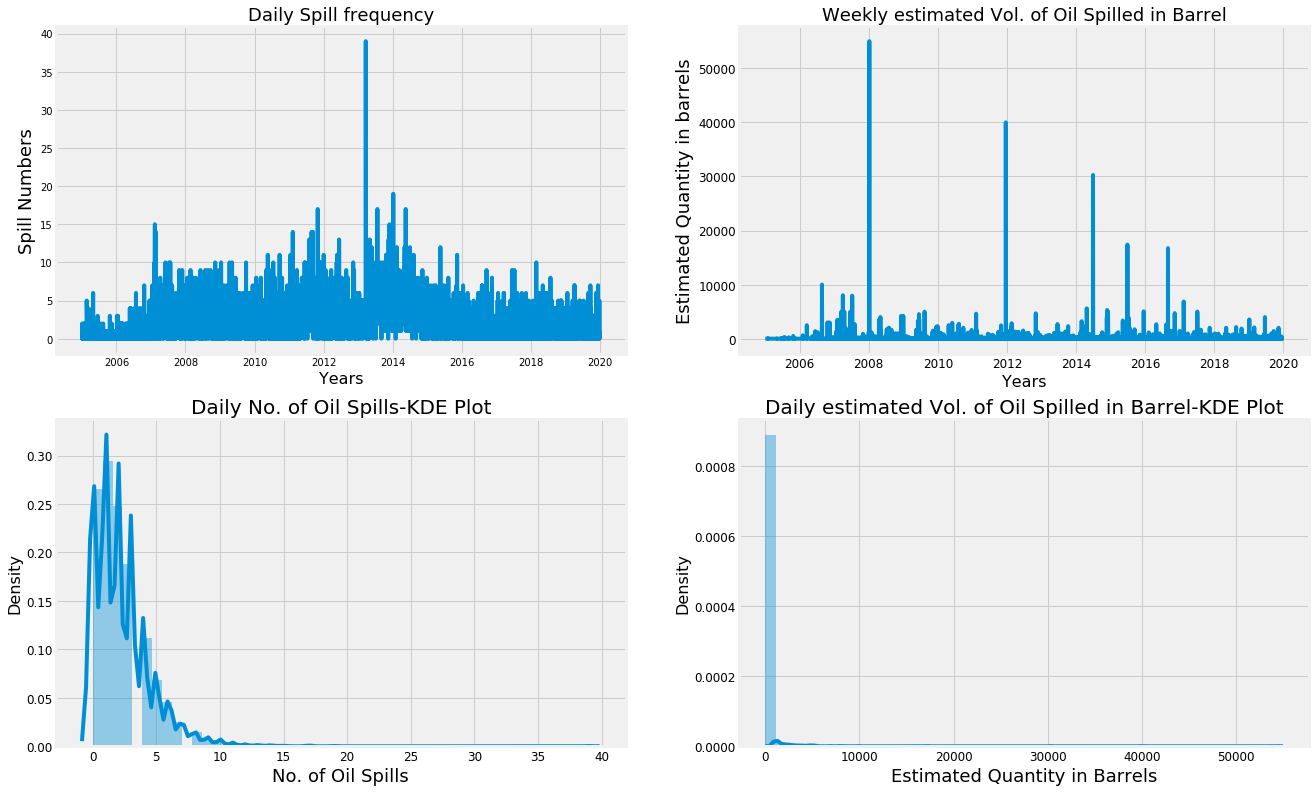

In [79]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqD_YM['incidentdate'], dfEqD_YM['spillno'] )
plt.title('Daily Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqD_YM['incidentdate'], dfEqD_YM['estimatedqty'] )
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqD_YM['spillno'])
plt.title('Daily No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqD_YM['estimatedqty'])
plt.title('Daily estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

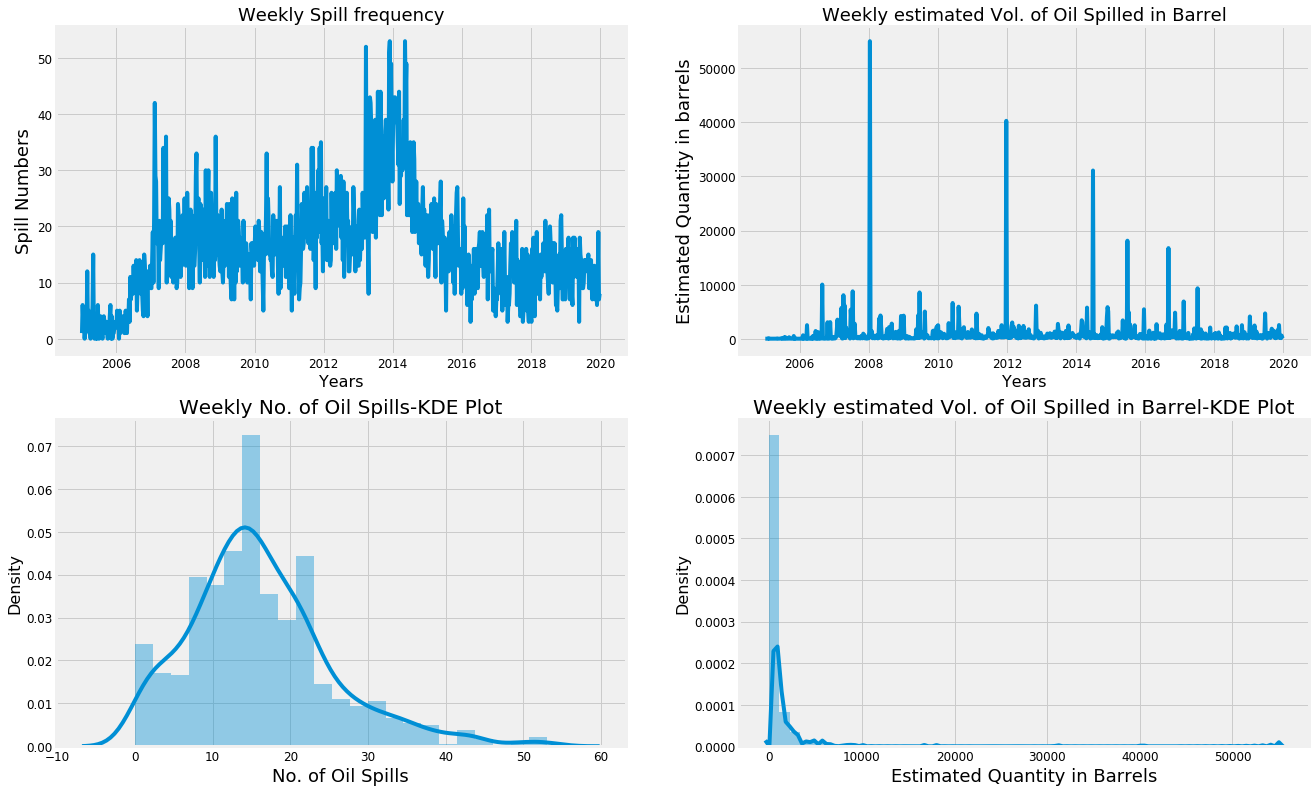

In [80]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqW_YM['incidentdate'], dfEqW_YM['spillno'] )
plt.title('Weekly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqW_YM['incidentdate'], dfEqW_YM['estimatedqty'] )
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqW_YM['spillno'])
plt.title('Weekly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqW_YM['estimatedqty'])
plt.title('Weekly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

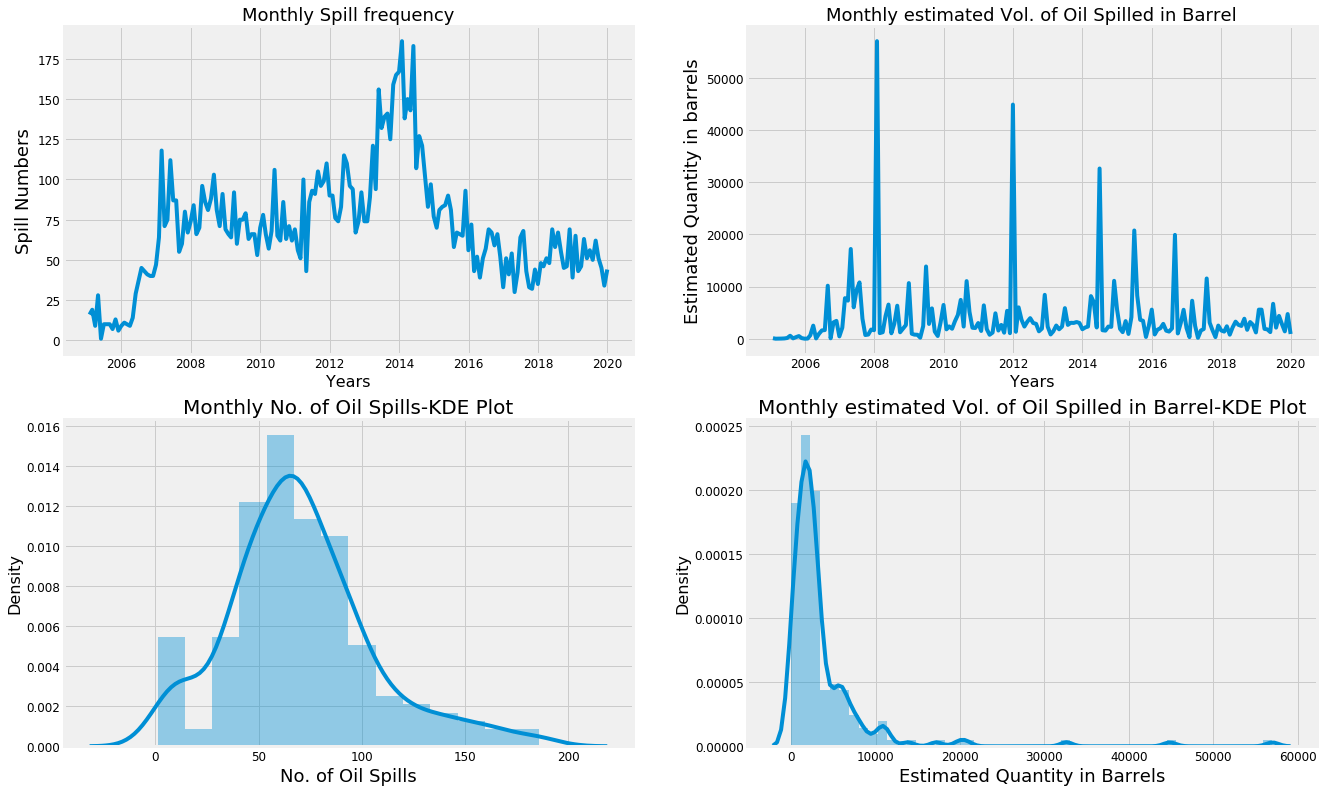

In [81]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqM_YM['incidentdate'], dfEqM_YM['spillno'] )
plt.title('Monthly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqM_YM['incidentdate'], dfEqM_YM['estimatedqty'] )
plt.title('Monthly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqM_YM['spillno'])
plt.title('Monthly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqM_YM['estimatedqty'])
plt.title('Monthly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

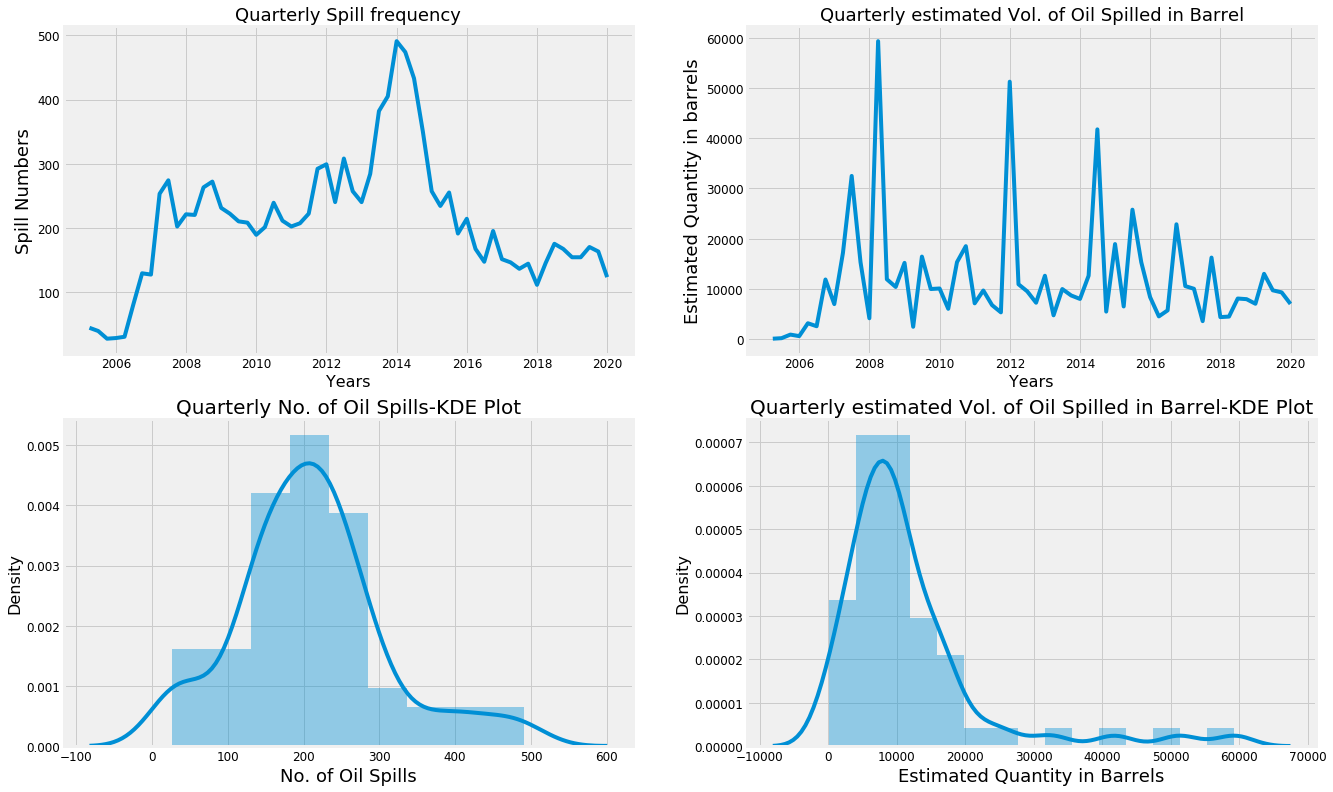

In [82]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqQ_YM['incidentdate'], dfEqQ_YM['spillno'] )
plt.title('Quarterly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqQ_YM['incidentdate'], dfEqQ_YM['estimatedqty'] )
plt.title('Quarterly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqQ_YM['spillno'])
plt.title('Quarterly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqQ_YM['estimatedqty'])
plt.title('Quarterly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

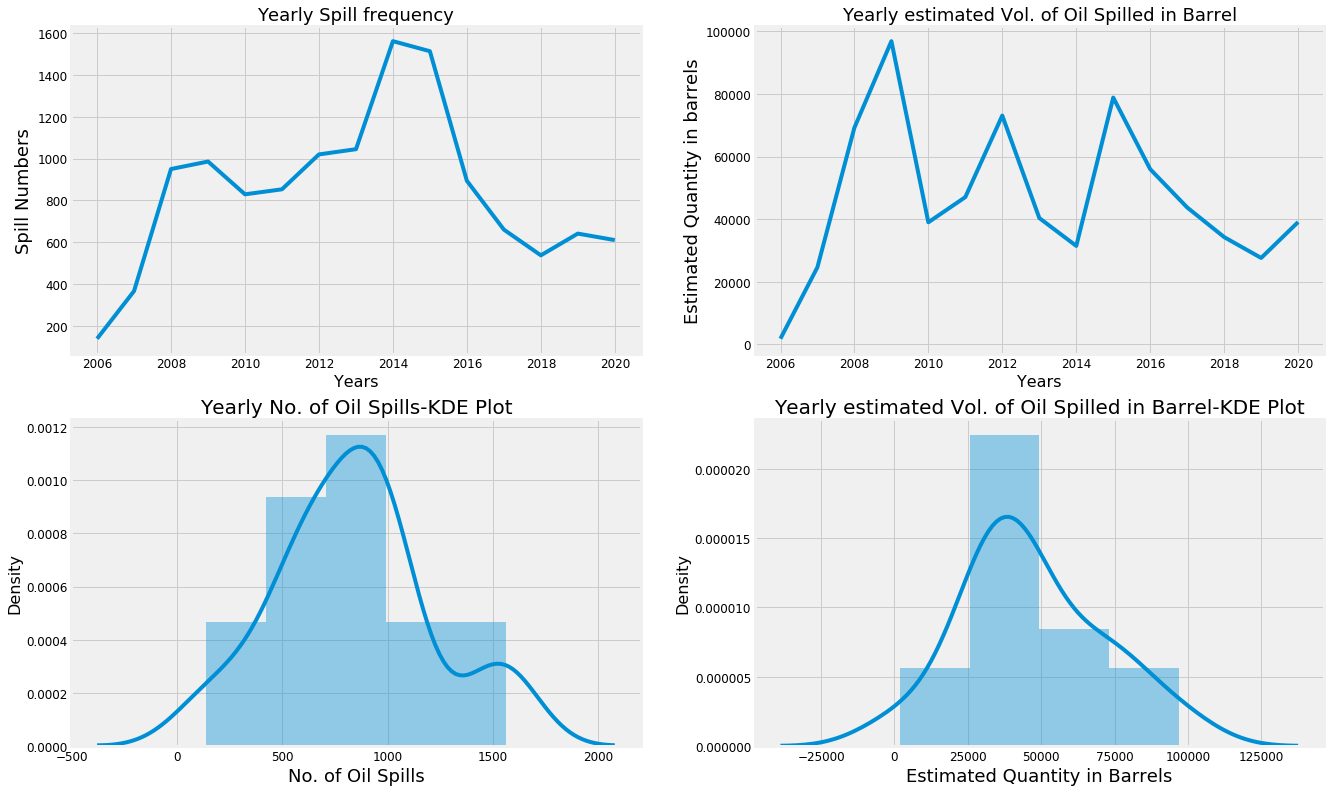

In [83]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(2,2,1)
plt.plot(dfEqY_YM['incidentdate'], dfEqY_YM['spillno'] )
plt.title('Yearly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,2)
plt.plot(dfEqY_YM['incidentdate'], dfEqY_YM['estimatedqty'] )
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,3)
sns.distplot(dfEqY_YM['spillno'])
plt.title('Yearly No. of Oil Spills-KDE Plot', fontsize = 20)
plt.xlabel('No. of Oil Spills', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(2,2,4)
sns.distplot(dfEqY_YM['estimatedqty'])
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel-KDE Plot', fontsize = 20)
plt.xlabel('Estimated Quantity in Barrels', fontsize = 18)
plt.ylabel('Density', fontsize = 16)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [84]:
dfEqD_YM

incidentdate  estimatedqty  spillno  Year  Month
0      2005-01-02  0.000000e+00        1  2005      1
1      2005-01-03  0.000000e+00        0  2005      1
2      2005-01-04  0.000000e+00        2  2005      1
3      2005-01-05  5.680000e-02        2  2005      1
4      2005-01-06  0.000000e+00        1  2005      1
5      2005-01-07  0.000000e+00        0  2005      1
6      2005-01-08  2.000000e-04        1  2005      1
7      2005-01-09  0.000000e+00        0  2005      1
8      2005-01-10  0.000000e+00        0  2005      1
9      2005-01-11  0.000000e+00        0  2005      1
10     2005-01-12  0.000000e+00        0  2005      1
11     2005-01-13  0.000000e+00        1  2005      1
12     2005-01-14  0.000000e+00        1  2005      1
13     2005-01-15  0.000000e+00        1  2005      1
14     2005-01-16  0.000000e+00        0  2005      1
15     2005-01-17  0.000000e+00        0  2005      1
16     2005-01-18  0.000000e+00        0  2005      1
17     2005-01-19  0.000000e+00        0  2005      1
18     2005-01-20  0.000000e+00        1  2005      1
19     2005-01-21  0.000000e+00        1  2005      1
20     2005-01-22  0.000000e+00        2  2005      1
21     2005-01-23  0.000000e+00        0  2005      1
22     2005-01-24  0.000000e+00        0  2005      1
23     2005-01-25  0.000000e+00        0  2005      1
24     2005-01-26  0.000000e+00        0  2005      1
25     2005-01-27  0.000000e+00        0  2005      1
26     2005-01-28  0.000000e+00        0  2005      1
27     2005-01-29  0.000000e+00        0  2005      1
28     2005-01-30  0.000000e+00        0  2005      1
29     2005-01-31  1.000000e+02        2  2005      1
30     2005-02-01  0.000000e+00        0  2005      2
31     2005-02-02  0.000000e+00        0  2005      2
32     2005-02-03  0.000000e+00        0  2005      2
33     2005-02-04  0.000000e+00        0  2005      2
34     2005-02-05  0.000000e+00        0  2005      2
35     2005-02-06  0.000000e+00        0  2005      2
36     2005-02-07  0.000000e+00        0  2005      2
37     2005-02-08  3.000000e-02        1  2005      2
38     2005-02-09  0.000000e+00        0  2005      2
39     2005-02-10  0.000000e+00        1  2005      2
40     2005-02-11  0.000000e+00        2  2005      2
41     2005-02-12  0.000000e+00        0  2005      2
42     2005-02-13  0.000000e+00        0  2005      2
43     2005-02-14  0.000000e+00        0  2005      2
44     2005-02-15  0.000000e+00        0  2005      2
45     2005-02-16  0.000000e+00        1  2005      2
46     2005-02-17  0.000000e+00        0  2005      2
47     2005-02-18  0.000000e+00        0  2005      2
48     2005-02-19  0.000000e+00        0  2005      2
49     2005-02-20  0.000000e+00        1  2005      2
50     2005-02-21  0.000000e+00        5  2005      2
51     2005-02-22  0.000000e+00        4  2005      2
52     2005-02-23  0.000000e+00        2  2005      2
53     2005-02-24  0.000000e+00        1  2005      2
54     2005-02-25  0.000000e+00        0  2005      2
55     2005-02-26  0.000000e+00        0  2005      2
56     2005-02-27  0.000000e+00        0  2005      2
57     2005-02-28  0.000000e+00        1  2005      2
58     2005-03-01  0.000000e+00        0  2005      3
59     2005-03-02  0.000000e+00        0  2005      3
60     2005-03-03  0.000000e+00        0  2005      3
61     2005-03-04  0.000000e+00        0  2005      3
62     2005-03-05  0.000000e+00        1  2005      3
63     2005-03-06  0.000000e+00        0  2005      3
64     2005-03-07  0.000000e+00        0  2005      3
65     2005-03-08  3.000000e+00        4  2005      3
66     2005-03-09  0.000000e+00        0  2005      3
67     2005-03-10  0.000000e+00        0  2005      3
68     2005-03-11  6.000000e-02        1  2005      3
69     2005-03-12  0.000000e+00        0  2005      3
70     2005-03-13  0.000000e+00        0  2005      3
71     2005-03-14  0.000000e+00        1  2005      3
72     2005-03-15  0.000000e+00        0  2005      3
73     20

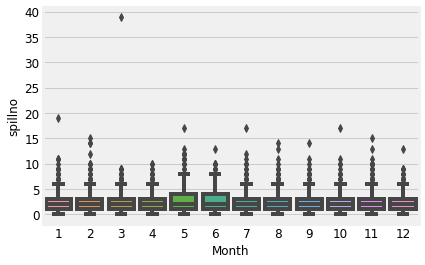

In [85]:
sns.boxplot(x = 'Month', y ='spillno', data = dfEqD_YM)

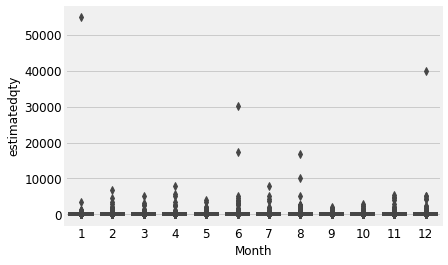

In [86]:
sns.boxplot(x = 'Month', y ='estimatedqty', data = dfEqD_YM)

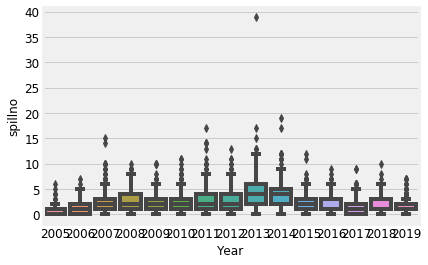

In [87]:
sns.boxplot(x = 'Year', y ='spillno', data = dfEqD_YM)


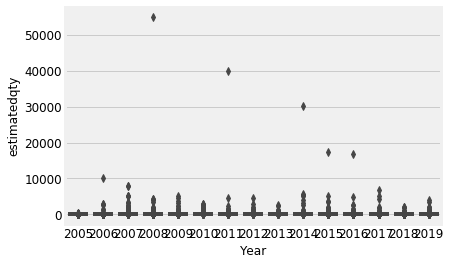

In [88]:
sns.boxplot(x = 'Year', y ='estimatedqty', data = dfEqD_YM)


In [89]:
dfEq_lt1g = dfEq_lt1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfEq_lt1g = dfEq_lt1g.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfEq_lt1g = dfEq_lt1g.reset_index()

In [90]:
dfEq_lt1g['Year'] = dfEq_lt1g['incidentdate'].dt.year
dfEq_lt1g['Month'] = dfEq_lt1g['incidentdate'].dt.month

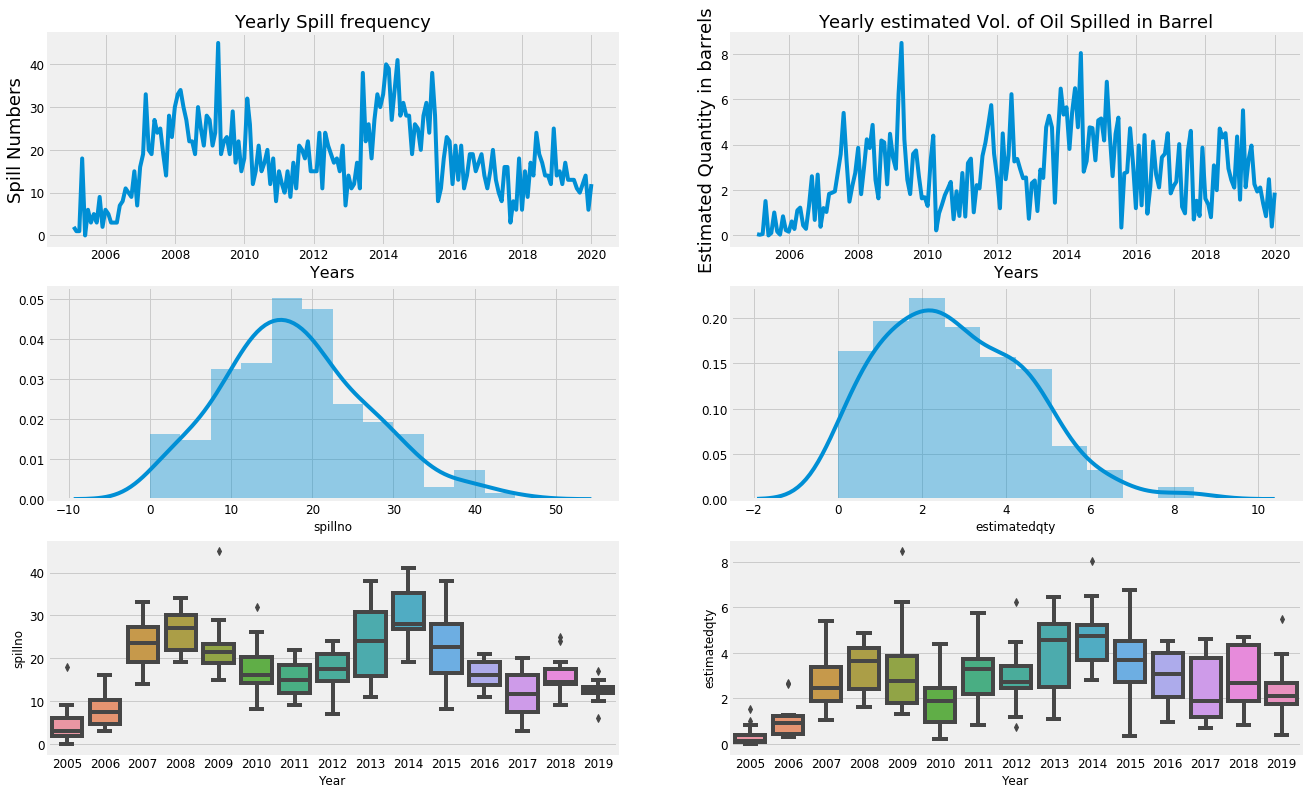

In [91]:
# PLOT OF SPILLS LESS THAN 1 BARREL GROUPED MONTHLY

plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)



plt.subplot(3,2,1)
plt.plot(dfEq_lt1g['incidentdate'], dfEq_lt1g['spillno'] )
plt.title('Yearly Spill frequency', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Spill Numbers', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,2,2)
plt.plot(dfEq_lt1g['incidentdate'], dfEq_lt1g['estimatedqty'] )
plt.title('Yearly estimated Vol. of Oil Spilled in Barrel', fontsize = 18)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Estimated Quantity in barrels', fontsize = 18)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,2,3)
sns.distplot(dfEq_lt1g['spillno'])

plt.subplot(3,2,4)
sns.distplot(dfEq_lt1g['estimatedqty'])

plt.subplot(3,2,5)
sns.boxplot(x = 'Year', y ='spillno', data = dfEq_lt1g)

plt.subplot(3,2,6)
sns.boxplot(x = 'Year', y ='estimatedqty', data = dfEq_lt1g)

In [92]:
dfEqD_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqD_YM.csv', index = False)
dfEqW_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqW_YM.csv', index = False)
dfEqM_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqM_YM.csv', index = False)
dfEqQ_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqQ_YM.csv', index = False)
dfEqY_YM.to_csv(r'C:\Users\OMEDE\Documents\dfEqY_YM.csv', index = False)
df0.to_csv(r'C:\Users\OMEDE\Documents\df0.csv', index = False)
df1.to_csv(r'C:\Users\OMEDE\Documents\df1.csv', index = False)
df2.to_csv(r'C:\Users\OMEDE\Documents\df2.csv', index = False)
dfEq.to_csv(r'C:\Users\OMEDE\Documents\dfEq.csv', index = False)
dfEqM.to_csv(r'C:\Users\OMEDE\Documents\dfEqM.csv', index = False)
dfEqY.to_csv(r'C:\Users\OMEDE\Documents\dfEqY.csv', index = False)
dfEqW.to_csv(r'C:\Users\OMEDE\Documents\dfEqW.csv', index = False)
dfEqD.to_csv(r'C:\Users\OMEDE\Documents\dfEqD.csv', index = False)
dfEqQ.to_csv(r'C:\Users\OMEDE\Documents\dfEqQ.csv', index = False)

In [128]:
dfEq1.to_csv(r'C:\Users\OMEDE\Documents\dfEq1.csv', index = False)

In [129]:
dfEq1

incidentdate  estimatedquantity
0       2006-11-23              225.0
1       2006-12-18                0.5
2       2006-12-27               25.0
3       2007-05-14                2.0
5       2007-08-30              200.0
...            ...                ...
14882   2015-04-21                NaN
14883   2014-05-17                NaN
14884   2014-05-05                NaN
14885   2015-04-23                NaN
14890   2018-05-12                3.1

[12605 rows x 2 columns]

In [93]:
dfEqY_YM

incidentdate  estimatedqty  spillno  Year  Month
0    2005-12-31   1842.723600      138  2005     12
1    2006-12-31  24636.287000      366  2006     12
2    2007-12-31  69167.936700      950  2007     12
3    2008-12-31  96847.249120      986  2008     12
4    2009-12-31  39010.140300      829  2009     12
5    2010-12-31  47049.500500      853  2010     12
6    2011-12-31  73082.435500     1020  2011     12
7    2012-12-31  40368.097300     1045  2012     12
8    2013-12-31  31469.481227     1562  2013     12
9    2014-12-31  78840.321201     1514  2014     12
10   2015-12-31  55986.864105      894  2015     12
11   2016-12-31  43724.654664      660  2016     12
12   2017-12-31  34277.876228      537  2017     12
13   2018-12-31  27630.316292      641  2018     12
14   2019-12-31  39086.162218      610  2019     12

In [94]:
AdfEqY_YM = dfEqY_YM.copy()

In [95]:
AdfEqY_YM = AdfEqY_YM.set_index('incidentdate')

In [96]:
AdfEqY_YM

estimatedqty  spillno  Year  Month
incidentdate                                    
2005-12-31     1842.723600      138  2005     12
2006-12-31    24636.287000      366  2006     12
2007-12-31    69167.936700      950  2007     12
2008-12-31    96847.249120      986  2008     12
2009-12-31    39010.140300      829  2009     12
2010-12-31    47049.500500      853  2010     12
2011-12-31    73082.435500     1020  2011     12
2012-12-31    40368.097300     1045  2012     12
2013-12-31    31469.481227     1562  2013     12
2014-12-31    78840.321201     1514  2014     12
2015-12-31    55986.864105      894  2015     12
2016-12-31    43724.654664      660  2016     12
2017-12-31    34277.876228      537  2017     12
2018-12-31    27630.316292      641  2018     12
2019-12-31    39086.162218      610  2019     12

In [100]:
dfEqD_YM.isna().sum()

incidentdate    0
estimatedqty    0
spillno         0
Year            0
Month           0
dtype: int64

In [103]:
dfEq.dtypes

incidentdate         datetime64[ns]
estimatedquantity           float64
dtype: object

In [104]:
dfEq

incidentdate  estimatedquantity
0       2006-11-23             225.00
1       2006-12-18               0.50
2       2006-12-27              25.00
3       2007-05-14               2.00
5       2007-08-30             200.00
...            ...                ...
14893   2020-06-08              52.54
14894   2020-06-08              65.44
14895   2020-07-07               7.00
14899   2020-03-27              43.00
14900   2020-04-23              54.00

[13249 rows x 2 columns]

In [105]:
AdEq = dfEq.copy()

In [107]:
AdEq = AdEq.set_index('incidentdate')

In [108]:
AdEq

estimatedquantity
incidentdate                   
2006-11-23               225.00
2006-12-18                 0.50
2006-12-27                25.00
2007-05-14                 2.00
2007-08-30               200.00
...                         ...
2020-06-08                52.54
2020-06-08                65.44
2020-07-07                 7.00
2020-03-27                43.00
2020-04-23                54.00

[13249 rows x 1 columns]

In [109]:
AdEq['2005'].isna().sum()

estimatedquantity    53
dtype: int64

In [111]:
AdEq['2006'].isna().sum()

estimatedquantity    153
dtype: int64

In [112]:
AdEq['2007'].isna().sum()

estimatedquantity    217
dtype: int64

In [113]:
AdEq['2008'].isna().sum()

estimatedquantity    273
dtype: int64

In [114]:
AdEq['2009'].isna().sum()

estimatedquantity    217
dtype: int64

In [115]:
AdEq['2010'].isna().sum()

estimatedquantity    230
dtype: int64

In [116]:
AdEq['2011'].isna().sum()

estimatedquantity    323
dtype: int64

In [117]:
AdEq['2012'].isna().sum()

estimatedquantity    316
dtype: int64

In [118]:
AdEq['2013'].isna().sum()

estimatedquantity    659
dtype: int64

In [119]:
AdEq['2014'].isna().sum()

estimatedquantity    539
dtype: int64

In [120]:
AdEq['2015'].isna().sum()

estimatedquantity    246
dtype: int64

In [121]:
AdEq['2016'].isna().sum()

estimatedquantity    152
dtype: int64

In [122]:
AdEq['2017'].isna().sum()

estimatedquantity    133
dtype: int64

In [123]:
AdEq['2018'].isna().sum()

estimatedquantity    108
dtype: int64

In [124]:
AdEq['2019'].isna().sum()

estimatedquantity    82
dtype: int64

In [125]:
AdEq['2020'].isna().sum()

estimatedquantity    12
dtype: int64

In [133]:
dfEqD1 = dfEqD.reset_index()


In [134]:
dfEqD1

incidentdate           sum  size
0      2005-01-02  0.000000e+00     1
1      2005-01-03  0.000000e+00     0
2      2005-01-04  0.000000e+00     2
3      2005-01-05  5.680000e-02     2
4      2005-01-06  0.000000e+00     1
5      2005-01-07  0.000000e+00     0
6      2005-01-08  2.000000e-04     1
7      2005-01-09  0.000000e+00     0
8      2005-01-10  0.000000e+00     0
9      2005-01-11  0.000000e+00     0
10     2005-01-12  0.000000e+00     0
11     2005-01-13  0.000000e+00     1
12     2005-01-14  0.000000e+00     1
13     2005-01-15  0.000000e+00     1
14     2005-01-16  0.000000e+00     0
15     2005-01-17  0.000000e+00     0
16     2005-01-18  0.000000e+00     0
17     2005-01-19  0.000000e+00     0
18     2005-01-20  0.000000e+00     1
19     2005-01-21  0.000000e+00     1
20     2005-01-22  0.000000e+00     2
21     2005-01-23  0.000000e+00     0
22     2005-01-24  0.000000e+00     0
23     2005-01-25  0.000000e+00     0
24     2005-01-26  0.000000e+00     0
25     2005-01-27  0.000000e+00     0
26     2005-01-28  0.000000e+00     0
27     2005-01-29  0.000000e+00     0
28     2005-01-30  0.000000e+00     0
29     2005-01-31  1.000000e+02     2
30     2005-02-01  0.000000e+00     0
31     2005-02-02  0.000000e+00     0
32     2005-02-03  0.000000e+00     0
33     2005-02-04  0.000000e+00     0
34     2005-02-05  0.000000e+00     0
35     2005-02-06  0.000000e+00     0
36     2005-02-07  0.000000e+00     0
37     2005-02-08  3.000000e-02     1
38     2005-02-09  0.000000e+00     0
39     2005-02-10  0.000000e+00     1
40     2005-02-11  0.000000e+00     2
41     2005-02-12  0.000000e+00     0
42     2005-02-13  0.000000e+00     0
43     2005-02-14  0.000000e+00     0
44     2005-02-15  0.000000e+00     0
45     2005-02-16  0.000000e+00     1
46     2005-02-17  0.000000e+00     0
47     2005-02-18  0.000000e+00     0
48     2005-02-19  0.000000e+00     0
49     2005-02-20  0.000000e+00     1
50     2005-02-21  0.000000e+00     5
51     2005-02-22  0.000000e+00     4
52     2005-02-23  0.000000e+00     2
53     2005-02-24  0.000000e+00     1
54     2005-02-25  0.000000e+00     0
55     2005-02-26  0.000000e+00     0
56     2005-02-27  0.000000e+00     0
57     2005-02-28  0.000000e+00     1
58     2005-03-01  0.000000e+00     0
59     2005-03-02  0.000000e+00     0
60     2005-03-03  0.000000e+00     0
61     2005-03-04  0.000000e+00     0
62     2005-03-05  0.000000e+00     1
63     2005-03-06  0.000000e+00     0
64     2005-03-07  0.000000e+00     0
65     2005-03-08  3.000000e+00     4
66     2005-03-09  0.000000e+00     0
67     2005-03-10  0.000000e+00     0
68     2005-03-11  6.000000e-02     1
69     2005-03-12  0.000000e+00     0
70     2005-03-13  0.000000e+00     0
71     2005-03-14  0.000000e+00     1
72     2005-03-15  0.000000e+00     0
73     2005-03-16  0.000000e+00     0
74     2005-03-17  0.000000e+00     0
75     2005-03-18  0.000000e+00     0
76     2005-03-19  0.000000e+00     0
77     2005-03-20  0.000000e+00     0
78     2005-03-21  0.000000e+00     0
79     2005-03-22  0.000000e+00     0
80     2005-03-23  0.000000e+00     0
81     2005-03-24  0.000000e+00     1
82     2005-03-25  0.000000e+00     0
83     2005-03-26  0.000000e+00     0
84     2005-03-27  0.000000e+00     1
85     2005-03-28  0.000000e+00     0
86     2005-03-29  0.000000e+00     0
87     2005-03-30  0.000000e+00     0
88     2005-03-31  0.000000e+00     0
89     2005-04-01  0.000000e+00     0
90     2005-04-02  0.000000e+00     0
91     2005-04-03  0.000000e+00     0
92     2005-04-04  0.000000e+00     0
93     2005-04-05  1.000000e-04     1
94     2005-04-06  0.000000e+00     0
95     2005-04-07  0.000000e+00     0
96     2005-04-08  3.000000e-02     1
97     2005-04-09  2.100000e+00     2
98     2005-04-10  0.000000e+00     0
99     2005-04-11  0.000000e+00     0
100    2005-04-12  0.000000e+00     0
101    2005-04-13  0.000000e+00     0
102    2005-04-14  3.500000e-02     1
103    2005-04-15  0.000000e+00     0
104    2005-04-

In [137]:
dfEqD_YM

incidentdate  estimatedqty  spillno
0      2005-01-02  0.000000e+00        1
1      2005-01-03  0.000000e+00        0
2      2005-01-04  0.000000e+00        2
3      2005-01-05  5.680000e-02        2
4      2005-01-06  0.000000e+00        1
5      2005-01-07  0.000000e+00        0
6      2005-01-08  2.000000e-04        1
7      2005-01-09  0.000000e+00        0
8      2005-01-10  0.000000e+00        0
9      2005-01-11  0.000000e+00        0
10     2005-01-12  0.000000e+00        0
11     2005-01-13  0.000000e+00        1
12     2005-01-14  0.000000e+00        1
13     2005-01-15  0.000000e+00        1
14     2005-01-16  0.000000e+00        0
15     2005-01-17  0.000000e+00        0
16     2005-01-18  0.000000e+00        0
17     2005-01-19  0.000000e+00        0
18     2005-01-20  0.000000e+00        1
19     2005-01-21  0.000000e+00        1
20     2005-01-22  0.000000e+00        2
21     2005-01-23  0.000000e+00        0
22     2005-01-24  0.000000e+00        0
23     2005-01-25  0.000000e+00        0
24     2005-01-26  0.000000e+00        0
25     2005-01-27  0.000000e+00        0
26     2005-01-28  0.000000e+00        0
27     2005-01-29  0.000000e+00        0
28     2005-01-30  0.000000e+00        0
29     2005-01-31  1.000000e+02        2
30     2005-02-01  0.000000e+00        0
31     2005-02-02  0.000000e+00        0
32     2005-02-03  0.000000e+00        0
33     2005-02-04  0.000000e+00        0
34     2005-02-05  0.000000e+00        0
35     2005-02-06  0.000000e+00        0
36     2005-02-07  0.000000e+00        0
37     2005-02-08  3.000000e-02        1
38     2005-02-09  0.000000e+00        0
39     2005-02-10  0.000000e+00        1
40     2005-02-11  0.000000e+00        2
41     2005-02-12  0.000000e+00        0
42     2005-02-13  0.000000e+00        0
43     2005-02-14  0.000000e+00        0
44     2005-02-15  0.000000e+00        0
45     2005-02-16  0.000000e+00        1
46     2005-02-17  0.000000e+00        0
47     2005-02-18  0.000000e+00        0
48     2005-02-19  0.000000e+00        0
49     2005-02-20  0.000000e+00        1
50     2005-02-21  0.000000e+00        5
51     2005-02-22  0.000000e+00        4
52     2005-02-23  0.000000e+00        2
53     2005-02-24  0.000000e+00        1
54     2005-02-25  0.000000e+00        0
55     2005-02-26  0.000000e+00        0
56     2005-02-27  0.000000e+00        0
57     2005-02-28  0.000000e+00        1
58     2005-03-01  0.000000e+00        0
59     2005-03-02  0.000000e+00        0
60     2005-03-03  0.000000e+00        0
61     2005-03-04  0.000000e+00        0
62     2005-03-05  0.000000e+00        1
63     2005-03-06  0.000000e+00        0
64     2005-03-07  0.000000e+00        0
65     2005-03-08  3.000000e+00        4
66     2005-03-09  0.000000e+00        0
67     2005-03-10  0.000000e+00        0
68     2005-03-11  6.000000e-02        1
69     2005-03-12  0.000000e+00        0
70     2005-03-13  0.000000e+00        0
71     2005-03-14  0.000000e+00        1
72     2005-03-15  0.000000e+00        0
73     2005-03-16  0.000000e+00        0
74     2005-03-17  0.000000e+00        0
75     2005-03-18  0.000000e+00        0
76     2005-03-19  0.000000e+00        0
77     2005-03-20  0.000000e+00        0
78     2005-03-21  0.000000e+00        0
79     2005-03-22  0.000000e+00        0
80     2005-03-23  0.000000e+00        0
81     2005-03-24  0.000000e+00        1
82     2005-03-25  0.000000e+00        0
83     2005-03-26  0.000000e+00        0
84     2005-03-27  0.000000e+00        1
85     2005-03-28  0.000000e+00        0
86     2005-03-29  0.000000e+00        0
87     2005-03-30  0.000000e+00        0
88     2005-03-31  0.000000e+00        0
89     2005-04-01  0.000000e+00        0
90     2005-04-02  0.000000e+00        0
91     2005-04-03  0.000000e+00        0
92     2005-04-04  0.000000e+00        0
93     2005-04-05  1.000000e-04        1
94     2005-04-06  0.000000e+00        0
95     2005-04-07  0.000000e+00        0
96     2005-04-08  3.000000e

In [143]:
AdEq['2018-06'].mean()



estimatedquantity    51.031007
dtype: float64

In [144]:
AdEq['2017-06'].mean()

estimatedquantity    37.830677
dtype: float64

In [145]:
AdEq['2016-06'].mean()

estimatedquantity    30.299913
dtype: float64

In [147]:
AdEq['2019-06'].mean()


estimatedquantity    142.174739
dtype: float64

In [148]:
AdEq['2020-06'].mean()

estimatedquantity    32.396
dtype: float64